In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12
# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')
# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns
sns.set()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [2]:
df = pd.read_csv('diabetes.csv')

# 1. Data Exploration

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies:Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [13]:
print("Diabetes data set dimensions : {}".format(df.shape))

Diabetes data set dimensions : (768, 9)


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

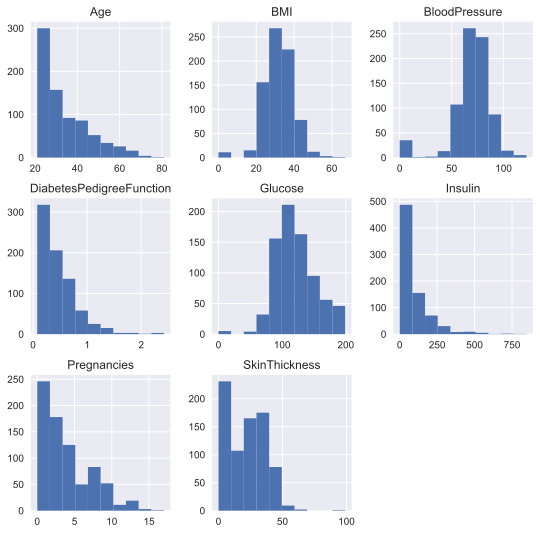

In [26]:
df[features].hist(figsize=(9,9));

We can observe that the data set contain 768 rows and 9 columns. ‘Outcome’ is the column which we are going to predict , which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means person is not. We can identify that out of the 768 persons, 500 are labeled as 0 (non diabetic) and 268 as 1 (diabetic)

In [16]:
df.groupby('Outcome').describe()

Age                                          ...  SkinThickness  \
         count       mean        std   min   25%   50%  ...            std   
Outcome                                                 ...                  
0        500.0  31.190000  11.667655  21.0  23.0  27.0  ...      14.889947   
1        268.0  37.067164  10.968254  21.0  28.0  36.0  ...      17.679711   

                                     
         min  25%   50%   75%   max  
Outcome                              
0        0.0  0.0  21.0  31.0  60.0  
1        0.0  0.0  27.0  36.0  99.0  

[2 rows x 64 columns]

In [17]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

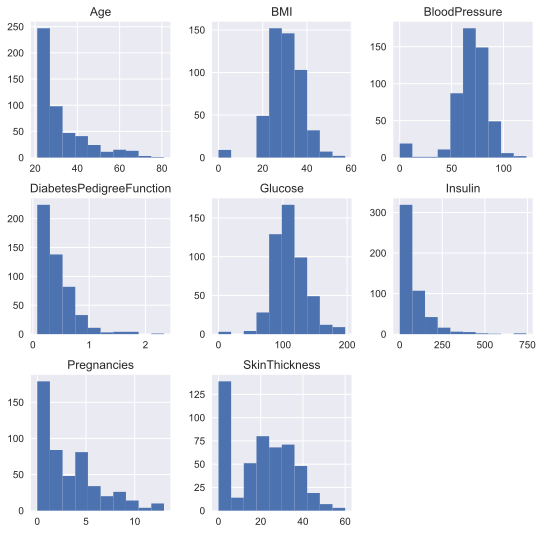

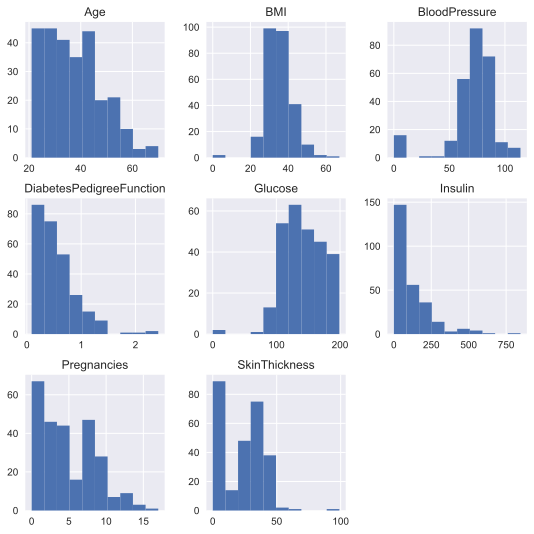

In [27]:
df.groupby('Outcome').hist(figsize=(9, 9));

# 2. Data Cleaning

In [30]:
#finding null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
#finding null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Unexpected Outliers

When analyzing the histogram we can identify that there are some outliers in some columns. We will further analyse those outliers and determine what we can do about them.

In [40]:
(df[df['BloodPressure'] == 0]).shape[0]

35

In [41]:
(df[df['BloodPressure'] == 0]).count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [46]:
(df[df['BloodPressure'] == 0]).groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,19,19,19,19,19,19,19,19
1,16,16,16,16,16,16,16,16


In [47]:
(df[df['BloodPressure'] == 0]).groupby('Outcome')['Age'].count()

Outcome
0    19
1    16
Name: Age, dtype: int64

In [51]:
(df[df['Glucose'] == 0]).shape[0]

5

In [48]:
(df[df['Glucose'] == 0]).groupby('Outcome')['Age'].count()

Outcome
0    3
1    2
Name: Age, dtype: int64

In [52]:
(df[df['SkinThickness'] == 0]).shape[0]

227

In [49]:
(df[df['SkinThickness'] == 0]).groupby('Outcome')['Age'].count()

Outcome
0    139
1     88
Name: Age, dtype: int64

In [53]:
(df[df['BMI'] == 0]).shape[0]

11

In [54]:
(df[df['BMI'] == 0]).groupby('Outcome')['Age'].count()

Outcome
0    9
1    2
Name: Age, dtype: int64

In [55]:
(df[df['Insulin'] == 0]).shape[0]

374

In [56]:
(df[df['Insulin'] == 0]).groupby('Outcome')['Age'].count()

Outcome
0    236
1    138
Name: Age, dtype: int64

In [64]:
new_df = df[(df['BloodPressure'] != 0) & (df['BMI'] != 0) & (df['Glucose'] != 0)]

In [66]:
new_df.shape

(724, 9)

# Phase 3— Feature Engineering

In [67]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [72]:
X = new_df[features]
y = new_df['Outcome']

# Phase 4— Model Selection


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

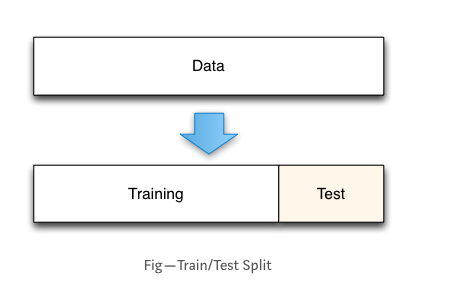

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = new_df.Outcome, random_state=0)

In [78]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.729282
4  GNB  0.734807
5   RF  0.751381
6   GB  0.773481


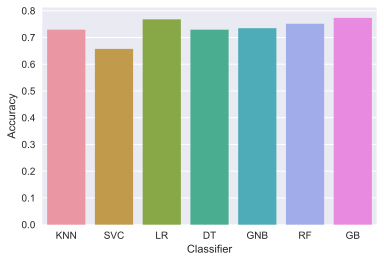

In [85]:
axiss = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axiss.set(xlabel='Classifier', ylabel='Accuracy')
plt.show()

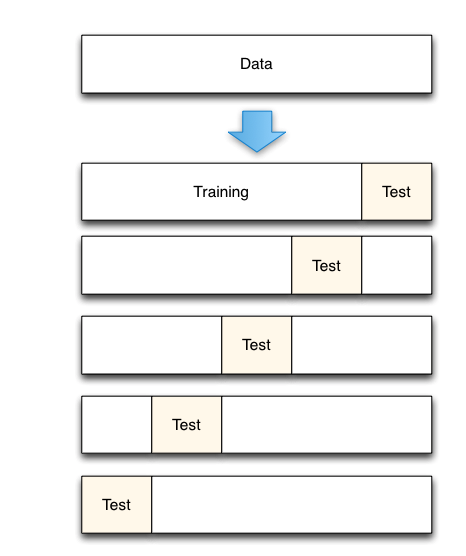

It is preferred to use this method where computation capability is not scarce. We will be using this method from here on out.
K-Fold Cross Validation with Scikit Learn :

We will move forward with K-Fold cross validation as it is more accurate and use the data efficiently. We will train the models using 10 fold cross validation and calculate the mean accuracy of the models. “cross_val_score” provides its own training and accuracy calculation interface.



In [80]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.719787
1  SVC  0.656279
2   LR  0.766781
3   DT  0.690658
4  GNB  0.757021
5   RF  0.754338
6   GB  0.775057


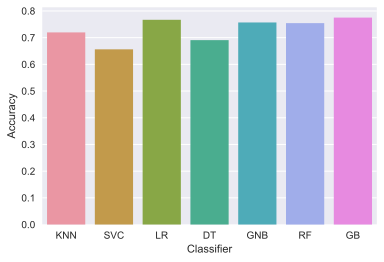

In [84]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
plt.show()

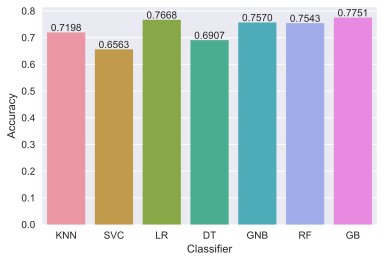

In [83]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
#Shows the value on top of each bar
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

We can see the Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boosting have performed better than the rest. From the base level we can observe that the Logistic Regression performs better than the other algorithms.

At the baseline Logistic Regression managed to achieve a classification accuracy of 77.64 %. This will be selected as the prime candidate for the next phases.
Summary
In this article we discussed about the basic machine learning workflow steps such as data exploration, data cleaning steps, feature engineering basics and model selection using Scikit Learn library. In the next article I will be discussing more about feature engineering, and hyper parameter tuning.